# Behavioral Cloning with Keras Project


## Load the file from a pickle

In [ ]:
import pickle

data_file = open('image_data.pkl', 'rb')
X_train, X_validation, X_test, y_train, y_validation, y_test = pickle.load(data_file)
data_file.close()

In [ ]:
print("Data loaded with training size of {}, validation size of {}, and test size of {}.".format(len(X_train), len(X_validation), len(X_test)))

In [ ]:
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
plt.figure(figsize=(1,1),dpi=400)

print(X_train[11].shape)
plt.imshow(X_train[11])

In [ ]:
plt.imshow(X_validation[11])

In [ ]:
plt.imshow(X_test[11])

In [ ]:
print("Start training the model. Input shape is ",X_train.shape[1:])
import tensorflow as tf
from keras.models import Sequential, model_from_json
from keras.layers.core import Activation, Flatten, Dropout
from keras.layers import Dense
from keras.layers.convolutional import Convolution2D

# 1st Layer - Convnet
model = Sequential()
model.add(Convolution2D(24, 5, 5,border_mode='valid',input_shape=X_train.shape[1:],subsample=(2, 2)))
#model.add(Activation('relu'))
#model.add(Dropout(0.5))

# 2nd Layer - Convnet
model.add(Convolution2D(36, 5, 5,border_mode='valid',subsample=(2, 2)))
#model.add(Dropout(0.5))
#model.add(Activation('relu'))

# 3rd Layer - Convnet
model.add(Convolution2D(48, 5, 5,border_mode='valid',subsample=(2, 2)))
#model.add(Dropout(0.5))
#model.add(Activation('relu'))

# 4th Layer - Convnet
model.add(Convolution2D(64, 3, 3,border_mode='valid'))
#model.add(Dropout(0.5))
#model.add(Activation('relu'))

# 5th Layer - Convnet
model.add(Convolution2D(64, 3, 3,border_mode='valid'))
#model.add(Dropout(0.5))
#model.add(Activation('relu'))

# Flatten
model.add(Flatten())
#model.add(Dense(1164))
#model.add(Activation('relu'))

# Fully connected layer
model.add(Dense(100))
#model.add(Activation('relu'))

# Fully connected layer
model.add(Dense(50))
#model.add(Activation('relu'))

# Fully connected layer
model.add(Dense(10))
#model.add(Activation('relu'))

# Output
model.add(Dense(1))

# Train the model
print(model.summary())
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=10, nb_epoch=1, validation_split=0.0, validation_data=(X_validation, y_validation),verbose=1)
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

In [ ]:
model.summary()

In [ ]:
y_prime = model.predict(X_test)

In [ ]:
print("Minimum is {} and maximum is {}".format(min(y_prime),max(y_prime)))

In [ ]:
import operator
index, value = max(enumerate(y_test), key=operator.itemgetter(1))

In [ ]:
index

In [ ]:
y_test[index]

In [ ]:
y_prime[index]

In [ ]:
from keras.models import model_from_json

In [ ]:
json_model = model.to_json()

In [ ]:
import os

In [ ]:
with open("model.json", "w") as json_file:
    json_file.write(json_model)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

# Read in the model, read an image, predict

In [7]:
import tensorflow as tf
from keras.models import model_from_json
from skimage.io import imread
from scipy.misc import imresize
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def normalizer(array, min_max=(0,1), feature_range=(0, 1)):
    x_min = feature_range[0]
    x_max = feature_range[1]
    a = min_max[0]
    b = min_max[1]
    norm_features = (array-x_min)*(b-a)/(x_max - x_min) + a
    return norm_features

In [3]:
image = imread('track1_IMG/center_2017_01_24_18_36_14_800.jpg')

(160, 320, 3)
Steering angle is -0.1188574


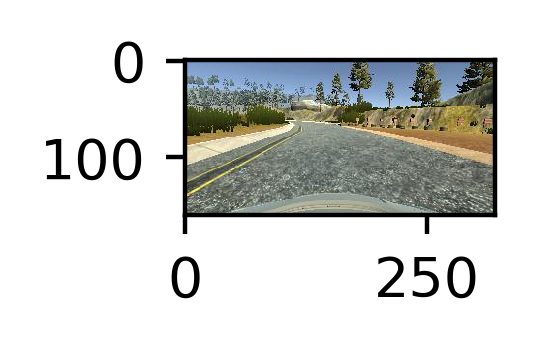

In [5]:
# Visualizations will be shown in the notebook.
%matplotlib inline
plt.figure(figsize=(1,1),dpi=400)

print(image.shape)
plt.imshow(image)
print("Steering angle is -0.1188574")

(66, 200, 3)
Steering angle is -0.1188574


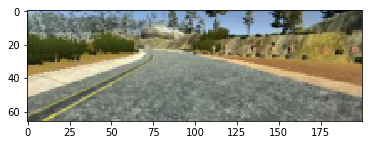

In [8]:
resized_image = imresize(image, (100,200,3))[16:,:,:][:66,:,:]
resized_image = np.array(resized_image)
normalized_image = normalizer(resized_image, min_max=(0,1), feature_range=(0,255))
print(resized_image.shape)
plt.imshow(resized_image)
print("Steering angle is -0.1188574")

In [22]:
print("Resized image",resized_image[0,0])
print("Normalized image",normalized_image[0,0])
print("Shape",normalized_image.shape)
normalized_image_reshape = normalized_image[None,:,:,:]
print(normalized_image_reshape.shape)

Resized image [115 144 176]
Normalized image [ 0.45098039  0.56470588  0.69019608]
Shape (66, 200, 3)
(1, 66, 200, 3)


In [21]:
print(type(resized_image))
print(type(normalized_image))
print(type(normalized_image_reshape))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'tuple'>


In [17]:
with open("model.json", 'r') as json_file:
    model = model_from_json(json_file.read())

In [18]:
model.compile("adam", "mse")

In [19]:
model.load_weights('model.h5')

In [26]:
steering_angle = float(model.predict(normalized_image_reshape, batch_size=1))
print(steering_angle)
adjusted_steering_angle = normalizer(steering_angle, min_max=(-1.0,1.0), feature_range=(-0.5,0.5))
print(adjusted_steering_angle)

-0.040718819946050644
-0.08143763989210129
